# Using Quantum Amplitude Amplification in Genetic Algorithms
___

### This notebook permits to reproduce all the experiments carried out in the research 'Using Quantum Amplitude Amplification in Genetic Algorithms' 

Please, note that this notebook enables you to simulate QGS with your local'qasm_simulator' because the access to real IBM quantum computers is limited by the users' privilegies 


### Firstly, let us import the required dependencies:

In [1]:
import genetic_algorithms as gs
from deap import tools
import random, json
import  Problems as Pb
import Utilities
import math, statistics, matplotlib.pyplot as plt
import os
from Utilities import S_RAND,S_LRS,S_QSO,S_RWS,S_SUS,S_TS
from genetic_algorithms import x_var
import Test
from qiskit import IBMQ
from qiskit import Aer

___
### Set the hyper-parameters for QGS and for the genetic algoritms: <br>

In detail:
- IND_SIZE = size of individuals in the genetic population
- pop_size = size of the population
- cxpb = crossover probability
- mutpb = mutation probability
- num_generations = number of generations in the GA
- tourn_size = tournament selection size


- beta = hyper-parameter $\beta$ of QGS
- grover_iters = hyper-parameter $n_g$ of QGS
- n_marked_QGS = hyper-parameter $t$ of QGS


- mean_inter= number of executions of each GA


Moreover, $\textit{all_functions}$ is the list containing the functions to optimize. All the funcions are described in the research paper. Please modify $\textit{fun_index}$ to select the function to optimize.

In [3]:
#HYPER-PARAMETERS
IND_SIZE = 6
pop_size = 7
cxpb = 0.8
mutpb = 0.1
num_generations = 5
tourn_size = 2

beta = math.pi/8
grover_iters = 3
n_marked_QGS = 3

mean_iter = 20


all_functions = [Pb.f1, Pb.f2, Pb.f3, Pb.f4, Pb.f5, Pb.f6, Pb.f7]

fun_index = 5
functions = [all_functions[fun_index-1]]


___

### Execute the GAs

f_5
iteration=  0  selector=  RWS
iteration=  1  selector=  RWS
iteration=  2  selector=  RWS
iteration=  3  selector=  RWS
iteration=  4  selector=  RWS
iteration=  5  selector=  RWS
iteration=  6  selector=  RWS
iteration=  7  selector=  RWS
iteration=  8  selector=  RWS
iteration=  9  selector=  RWS
iteration=  10  selector=  RWS
iteration=  11  selector=  RWS
iteration=  12  selector=  RWS
iteration=  13  selector=  RWS
iteration=  14  selector=  RWS
iteration=  15  selector=  RWS
iteration=  16  selector=  RWS
iteration=  17  selector=  RWS
iteration=  18  selector=  RWS
iteration=  19  selector=  RWS
iteration=  0  selector=  SUS
iteration=  1  selector=  SUS
iteration=  2  selector=  SUS
iteration=  3  selector=  SUS
iteration=  4  selector=  SUS
iteration=  5  selector=  SUS
iteration=  6  selector=  SUS
iteration=  7  selector=  SUS
iteration=  8  selector=  SUS
iteration=  9  selector=  SUS
iteration=  10  selector=  SUS
iteration=  11  selector=  SUS
iteration=  12  selector

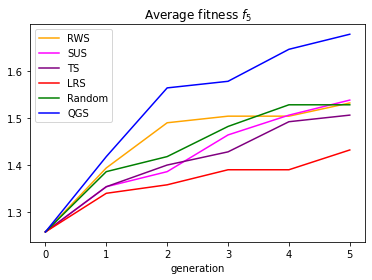

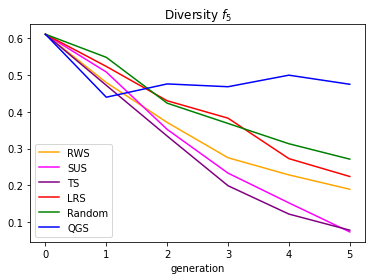

In [6]:
toolbox=gs.createToolbox(IND_SIZE,beta,Aer)
stats=gs.createStats()
list_pop=[]
for k in range(mean_iter):
    list_pop.append(toolbox.population(n=pop_size))

for i in range(len(functions)):
    
    def evaluate_binary(individual):
        return functions[i](individual)
    
    toolbox.register('evaluate', evaluate_binary)
    print('f_'+str(fun_index))
    

    selectors=[S_RWS, S_SUS, S_TS, S_LRS, S_RAND, S_QSO]
    colors={S_RWS:"orange",S_SUS: "magenta", S_TS:"purple", S_LRS:"red", S_RAND: "green", S_QSO:"blue"}


    dict={}
    for sel in selectors:
        dict[sel]=Test.test_selector(toolbox,selector=sel, tourn_size=tourn_size,  grv_iter=grover_iters, pop_size=pop_size,cxpb=cxpb, mutpb=mutpb, mean_iter=mean_iter, n_gen=num_generations, stats=stats,n_marked_QGS=n_marked_QGS, pop_list = list_pop)
        

    fig_c = plt.figure(1)

    for sel in selectors:
        plt.plot(list(dict[sel][0].keys()), list(dict[sel][0].values()), color=colors[sel], label=sel)

    plt.title(r'Average fitness ' + '$f_' + str(fun_index)+'$')
    plt.xlabel('generation')
    plt.legend()
    
    plt.show()

    fig_q = plt.figure(2)

    for sel in selectors:
        plt.plot(list(dict[sel][1].keys()), list(dict[sel][1].values()), color=colors[sel], label=sel)

    plt.title(r'Diversity ' + '$f_' + str(fun_index)+'$')
    plt.xlabel('generation')
    plt.legend()
    
    plt.show()